In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
import matplotlib.patches as patches

In [6]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=[plt.get_cmap('Dark2')(a) for a in np.arange(0.,0.9,0.12)][::-1]) 

In [7]:
from scipy.optimize import fixed_point

In [1000]:
ds=1
lx=500
ly=200
Nx=int(lx/ds)
Ny=int(ly/ds)

In [1001]:
mat_m=pd.read_csv('/home/invites/benvegnen/AI2D/PDEs_2d/f_m.dat', sep=' ', names=np.arange(Ny), index_col=False, dtype=np.float64)
vmin=np.min(mat_m.values)
# m.columns=['%s'%str(a) for a in np.arange(5000)]
# m.to_parquet('/home/invites/benvegnen/AI2D/PDEs_2d/f_m.parquet')

In [1004]:
1/1.17

0.8547008547008548

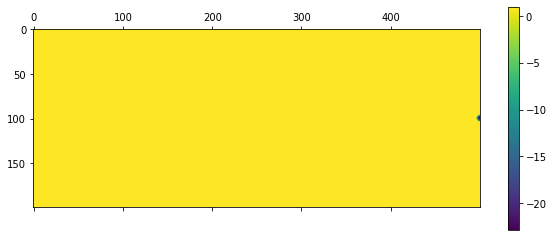

In [1002]:
t=0
plt.matshow(mat_m.values[t*Nx:(t+1)*Nx,:].T)
plt.colorbar()

(75, 125)

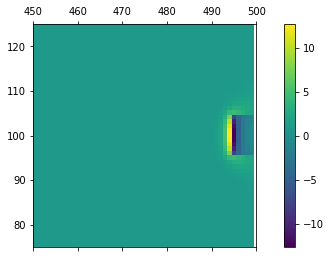

In [1003]:
t=3
plt.matshow(mat_m.values[t*Nx:(t+1)*Nx,:].T)
plt.colorbar()
plt.xlim(450,500)
plt.ylim(75, 125)

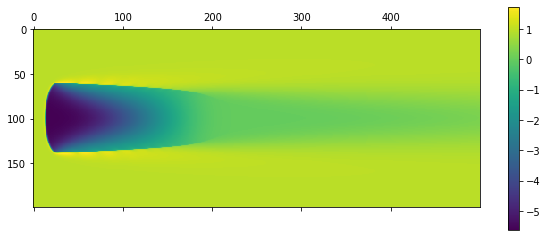

In [161]:
t=8
plt.matshow(mat_m.values[t*Nx:(t+1)*Nx,:].T)
plt.colorbar()

In [213]:
mat_rho=pd.read_csv('/home/invites/benvegnen/AI2D/PDEs_2d/f_rho.dat', sep=' ', names=np.arange(Ny), index_col=False, dtype=np.float64)
# rho.columns=['%s'%str(a) for a in np.arange(5000)]
# rho.to_parquet('/home/invites/benvegnen/AI2D/PDEs_2d/f_rho.parquet')

No handles with labels found to put in legend.


Text(0.5, 1.0, '$m(x, y=100)$')

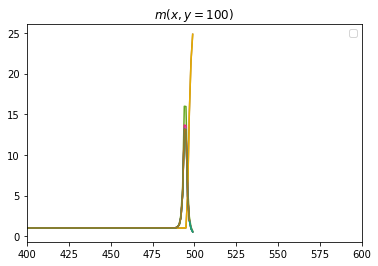

In [218]:
for t in np.arange(0, 15,1):
    m=mat_rho.values[t*Nx:(t+1)*Nx,:].T
    plt.plot(m[int(Ny/2),:])#, label=r'$t=%d$'%(1*t))
plt.legend()
plt.xlim(400,600)
# plt.ylim(-10,4)
plt.title(r'$m(x, y=%d)$'%int(Ny/2))

Text(0.5, 1.0, '$m(x, y=100)$')

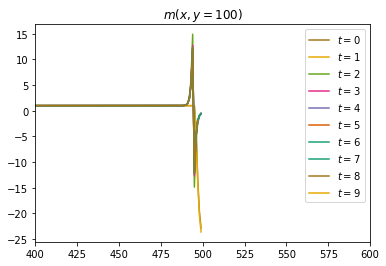

In [219]:
for t in np.arange(0, 10):
    m=mat_m.values[t*Nx:(t+1)*Nx,:].T
    plt.plot(m[int(Ny/2),:], label=r'$t=%d$'%(1*t))
plt.legend()
plt.xlim(400,600)
# plt.ylim(-10,4)
plt.title(r'$m(x, y=%d)$'%int(Ny/2))

In [216]:
rho0=1.
t=5
V=np.max(np.max(np.abs(mat_rho.values[t*Nx:(t+1)*Nx,:])))/rho0
print(np.linspace(0, -V, 5))

for t in np.arange(2, 30,1):
    m=mat_m.values[t*Nx:(t+1)*Nx,:].T
    xmin=np.where((np.roll(m[np.int64(Ny/2),:],1)>0)&(m[np.int64(Ny/2),:]<0))[0][0]
    xmax=np.where(m[np.int64(Ny/2),xmin+1:]>-1e-1)[0][0]+xmin
    
    Lmax=np.max(np.sum(m<0, axis=0))
    yM=np.int64(Ny/2)#np.argmax(np.sum(m<0, axis=0))
    ymin=yM-np.int64(0.5*Lmax)
    ymax=yM+np.int64(0.5*Lmax)

    print(xmin, xmax, ymin, ymax)
    l=plt.matshow(m, cmap='PiYG', vmin=-V, vmax=V)
    cbar=plt.colorbar(l)
    cbar.ax.set_title(r'$m(x,y)/\rho_0$', rotation=0)

    offsetx=0.5*(xmax-xmin)
    offsety=0.2*(ymax-ymin)
    plt.xlim(xmin-offsetx, xmax+offsetx)
    plt.ylim(ymin-offsety, ymax+offsety)

    
    xlist = np.arange(xmin, xmax)
    ylist = np.arange(ymin, ymax)
    X, Y = np.meshgrid(xlist, ylist)
    Z = m[ymin:ymax,xmin:xmax]
    cp = plt.contour(X, Y, Z, levels=np.linspace(0, -V, 5)[::-1], colors=['k'])
    
    plt.xticks([xmin, xmax])
    plt.title(r'$t=%d$'%(10*t), pad=20)
    plt.show()
    



[  0.         -3.2904225  -6.580845   -9.8712675 -13.16169  ]


IndexError: index 0 is out of bounds for axis 0 with size 0

# Droplet size depending on beta & D

In [4]:
list_beta=np.round(np.arange(1.1,3.1,0.1),decimals=1)
list_D=np.array([0.5, 1,2])

In [5]:
Ny=2200

mat_m={}

for D in list_D:
    mat_m[D]={}
    for beta in list_beta:
        print(D,beta)
        mat_m[D][beta]={}
        for t in [5000]:#np.arange(1000,10900,1000):
            try:
                mat_m[D][beta][t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/droplet_size_beta_D%s/beta%.1f/f_m_t%d.dat'%(str(D), beta,t), sep=' ', dtype=np.float64, names=np.arange(Ny+2))
                #mat_m[beta][t]=pd.read_parquet('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/asympt_prof_varying_beta_v4/beta%.1f/f_m_t%d.parquet'%(beta,t))

            except:
                pass


0.5 1.1
0.5 1.2
0.5 1.3
0.5 1.4
0.5 1.5
0.5 1.6
0.5 1.7
0.5 1.8
0.5 1.9
0.5 2.0
0.5 2.1
0.5 2.2
0.5 2.3
0.5 2.4
0.5 2.5
0.5 2.6
0.5 2.7
0.5 2.8
0.5 2.9
0.5 3.0
1.0 1.1
1.0 1.2
1.0 1.3
1.0 1.4
1.0 1.5
1.0 1.6
1.0 1.7
1.0 1.8
1.0 1.9
1.0 2.0
1.0 2.1
1.0 2.2
1.0 2.3
1.0 2.4
1.0 2.5
1.0 2.6
1.0 2.7
1.0 2.8
1.0 2.9
1.0 3.0
2.0 1.1
2.0 1.2
2.0 1.3
2.0 1.4
2.0 1.5
2.0 1.6
2.0 1.7
2.0 1.8
2.0 1.9
2.0 2.0
2.0 2.1
2.0 2.2
2.0 2.3
2.0 2.4
2.0 2.5
2.0 2.6
2.0 2.7
2.0 2.8
2.0 2.9
2.0 3.0


5000


(1000, 1200)

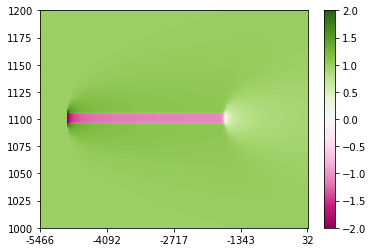

In [344]:
kt=-2
beta=3
D=0.5

t=5000#list(mat_m[D][beta])[kt]
print(t)
V=-2#np.nanmin(mat_m[D][beta][list(mat_m[D][beta])[-1]].values)/100
plt.imshow(mat_m[D][beta][t].T, cmap='PiYG', vmin=V, vmax=-V, aspect='auto')
plt.colorbar()

xabs=np.int64(np.linspace(0, mat_m[D][beta][t].shape[0]-2, 5))
plt.xticks(xabs, np.int64(np.array(mat_m[D][beta][t][0])[xabs]))

plt.ylim(1000,1200)


In [15]:
h_beta={}
abs_beta={}
for D in list_D:
    h_beta[D]=[]
    abs_beta[D]=[]
    for beta in list_beta:
        try:
            h_beta[D].append(np.max(np.sum(mat_m[D][beta][t].T<0, axis=0)))
            abs_beta[D].append(beta)
        except:
            pass

Text(0, 0.5, 'Vertical spreading')

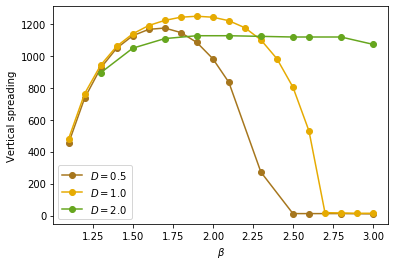

In [17]:
for D in list_D:
    plt.plot(abs_beta[D], h_beta[D], '-o', label=r'$D=%.1f$'%D)
plt.legend()
plt.xlabel(r'$\beta$')
plt.ylabel(r'Vertical spreading')

# Droplet size depending on ds

In [8]:
list_ds=np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [13]:
ly=600

mat_m_ds={}
mat_m_ds_beta3={}
mat_m_ds_beta3_5={}


for ds in list_ds:
    mat_m_ds[ds]={}
    mat_m_ds_beta3[ds]={}
    mat_m_ds_beta3_5[ds]={}


    Ny=np.int64(ly/ds)
    for t in [2000]:
        try:
            mat_m_ds[ds][t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/droplet_size_ds_2/ds%s/f_m_t%d.dat'%(str(ds),t), sep=' ', dtype=np.float64, names=np.arange(Ny+2))

        except:
            pass
        
        try:
            mat_m_ds_beta3[ds][t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/droplet_size_ds_beta3/ds%s/f_m_t%d.dat'%(str(ds),t), sep=' ', dtype=np.float64, names=np.arange(Ny+2))

        except:
            pass
        try:
            mat_m_ds_beta3_5[ds][t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d_MPI/fluct_size_ds_beta3.5/ds%s/f_m_t%d.dat'%(str(ds),t), sep=' ', dtype=np.float64, names=np.arange(Ny+2))

        except:
            pass



In [19]:
ds=1.0
Ny=np.int64(ly/ds)
df=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d_MPI/fluct_size_ds_beta3.5/ds%s/f_m_t%d.dat'%(str(ds),t), sep=' ', dtype=np.float64, names=np.arange(Ny+2))

In [30]:
df[]

0    \
0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.998154 0.9981

In [29]:
df[5].values.shape

(1000,)

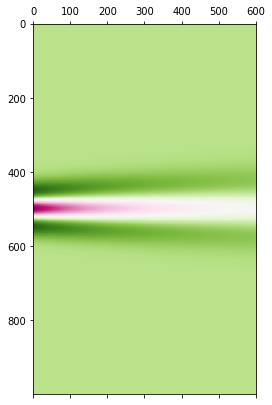

In [32]:
plt.matshow(df, cmap='PiYG')


KeyError: 0.30000000000000004

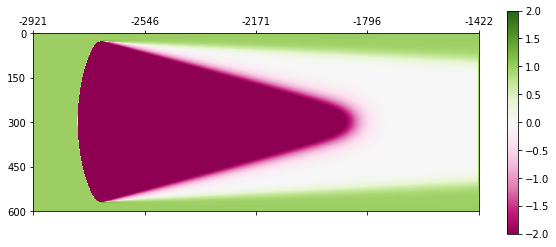

In [291]:
ds=0.4

t=2000
V=-2


plt.matshow(mat_m_ds[ds][t].T, cmap='PiYG', vmin=V, vmax=-V)
plt.colorbar()

xabs=np.int64(np.linspace(0, mat_m_ds[ds][t].shape[0]-2, 5))
yabs=np.int64(np.linspace(0, mat_m_ds[ds][t].shape[1]-1, 5))

plt.xticks(xabs, np.int64(ds*np.array(mat_m_ds[ds][t][0])[xabs]));
plt.yticks(yabs, np.int64(ds*yabs));


ds=0.30000000000000004
plt.matshow(mat_m_ds[ds][t].T, cmap='PiYG', vmin=V, vmax=-V)
plt.colorbar()

xabs=np.int64(np.linspace(0, mat_m_ds[ds][t].shape[0]-2, 5))
yabs=np.int64(np.linspace(0, mat_m_ds[ds][t].shape[1]-1, 5))

plt.xticks(xabs, np.int64(ds*np.array(mat_m_ds[ds][t][0])[xabs]));
plt.yticks(yabs, np.int64(ds*yabs));

In [11]:
h_ds=[]
abs_ds=[]
for ds in list_ds:
    try:
        h_ds.append(np.max(np.sum(mat_m_ds[ds][t].T<0, axis=0)))
        abs_ds.append(ds)
    except:
        pass
    
h_ds_beta3=[]
abs_ds_beta3=[]
for ds in list_ds:
    try:
        h_ds_beta3.append(np.max(np.sum(mat_m_ds_beta3[ds][t].T<0, axis=0)))
        abs_ds_beta3.append(ds)
    except:
        pass

Text(0, 0.5, 'Vertical spreading')

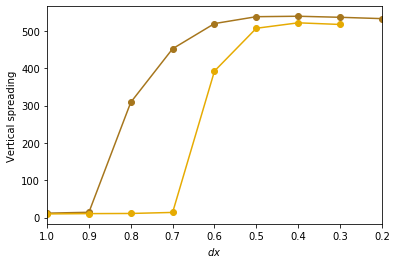

In [12]:
plt.plot(abs_ds, h_ds*np.array(abs_ds), '-o')
plt.plot(abs_ds_beta3, h_ds_beta3*np.array(abs_ds_beta3), '-o')

plt.xlim(1.0,0.2)
plt.xlabel(r'$dx$')
plt.ylabel(r'Vertical spreading')

In [233]:
def fluct(x, y, r0, rhof):
    #print(x)
    if(x*x+y*y>r0*r0):
        return(0)
    else:
        return((rhof/0.148)*np.exp(-1./(1.-(x*x+y*y)/(r0*r0))))

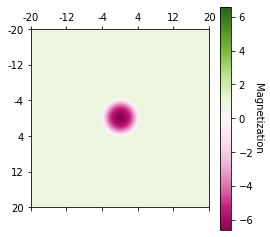

In [324]:
r0=5
d=4
dsx=np.linspace(-d*r0,d*r0,1000)
dsy=np.linspace(-d*r0,d*r0, 1000)

M=np.zeros((len(dsx),len(dsy)))
for nx in range(len(dsx)):
    for ny in range(len(dsy)):
        M[nx][ny]=fluct(dsx[nx], dsy[ny], r0, rhof)

rhof=3
rho0=1
beta=1.5
m0=rho0*fixed_point(lambda x: np.tanh(beta*x), 0.5)

plt.matshow(m0-M, vmin=-np.max(np.abs(m0-M)), vmax=np.max(np.abs(m0-M)), cmap='PiYG')
cbar=plt.colorbar()
cbar.set_label('Magnetization', rotation=270, labelpad=10)

plt.xticks(np.arange(0,1200,200), np.int64(np.linspace(-d*r0, d*r0, 6)));
plt.yticks(np.arange(0,1200,200), np.int64(np.linspace(-d*r0, d*r0, 6)));


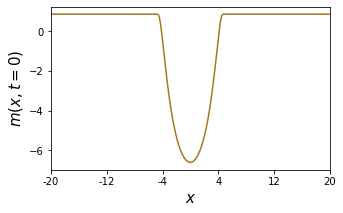

In [345]:
plt.figure(figsize=(5,3))
plt.plot((m0-M)[500,:])
plt.xlabel(r'$x$', fontsize=15)
plt.ylabel(r'$m(x,t=0)$', fontsize=15)

plt.xlim(0,1000)
plt.xticks(np.arange(0,1200,200), np.int64(np.linspace(-d*r0, d*r0, 6)));


In [261]:
np.max(np.abs(m0-M))

23.993177560847926

# Varying $\beta$

In [58]:
list_beta=np.array([1.1, 1.2, 1.4, 1.8, 2.5, 4.0])
list_beta=np.array([2.5])

In [60]:
Ny=11000

mat_m={}
for beta in list_beta:
    mat_m[beta]={}
    for t in np.arange(5000,41000,5000):
        print(t)
        try:
            mat_m[beta][t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/asympt_prof_varying_beta_v4/beta%.1f/f_m_t%d.dat'%(beta,t), sep=' ', dtype=np.float64, names=np.arange(Ny+2))
            #mat_m[beta][t]=pd.read_parquet('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/asympt_prof_varying_beta_v4/beta%.1f/f_m_t%d.parquet'%(beta,t))

        except:
            pass


5000
10000
15000
20000
25000
30000
35000
40000


In [61]:
mat_m[2.5][5000]

,0,1,2,3,4,5,6,7,8,9,...,10992,10993,10994,10995,10996,10997,10998,10999,11000,11001
0,-7010.0,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,...,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,NaN
1,-7009.0,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,...,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,NaN
2,-7008.0,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,...,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,NaN
3,-7007.0,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,...,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,NaN
4,-7006.0,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,...,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,14985.0,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,...,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,NaN
21996,14986.0,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,...,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,NaN
21997,14987.0,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,...,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,NaN
21998,14988.0,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,...,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,0.985624,NaN


40000


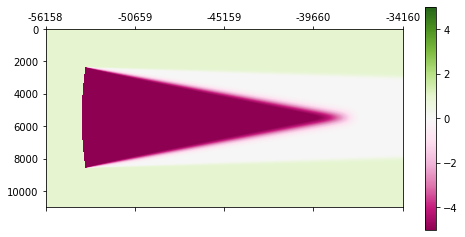

In [63]:
kt=-1
beta=2.5


t=list(mat_m[beta])[kt]
print(t)
V=-5#np.nanmin(mat_m[beta][list(mat_m[beta])[-1]].values)/100
plt.matshow(mat_m[beta][t].T, cmap='PiYG', vmin=V, vmax=-V)
plt.colorbar()

xabs=np.int64(np.linspace(0, mat_m[beta][t].shape[0]-2, 5))
plt.xticks(xabs, np.int64(np.array(mat_m[beta][t][0])[xabs]))

# plt.xlim(0,50)
# plt.ylim(450,550)

plt.show()


#plt.matshow(np.isnan(mat_m[beta][t].T))

## To parquet

In [66]:
Ny=11000
beta=2.5

mat_rho={}
for beta in list_beta:
    mat_rho[beta]={}
    for t in np.arange(5000,41000,5000):
        print(t)
        try:
            mat_rho[beta][t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/asympt_prof_varying_beta_v4/beta%.1f/f_rho_t%d.dat'%(beta,t), sep=' ', dtype=np.float64, names=np.arange(Ny+2))

        except:
            pass


5000
10000
15000
20000
25000
30000
35000
40000


40000


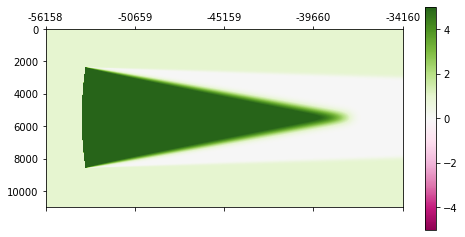

In [67]:
kt=-1
beta=2.5


t=list(mat_rho[beta])[kt]
print(t)
V=-5#np.nanmin(mat_m[beta][list(mat_m[beta])[-1]].values)/100
plt.matshow(mat_rho[beta][t].T, cmap='PiYG', vmin=V, vmax=-V)
plt.colorbar()

xabs=np.int64(np.linspace(0, mat_rho[beta][t].shape[0]-2, 5))
plt.xticks(xabs, np.int64(np.array(mat_rho[beta][t][0])[xabs]))

# plt.xlim(0,50)
# plt.ylim(450,550)

plt.show()


#plt.matshow(np.isnan(mat_m[beta][t].T))

In [68]:
beta=2.5
for t in np.arange(5000,41000,5000):
    mat_rho[beta][t].columns=['%s'%str(a) for a in list(mat_rho[beta][t])]
    mat_rho[beta][t].to_parquet('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/asympt_prof_varying_beta_v4/beta%.1f/f_rho_t%d.parquet'%(beta,t), compression='gzip')

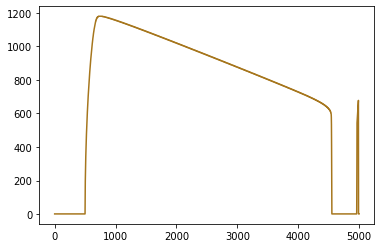

In [1288]:
plt.plot(np.sum((mat_m[beta][t].T)<0))

In [1289]:
np.max(np.sum((mat_m[beta][t].T)<0))

1180

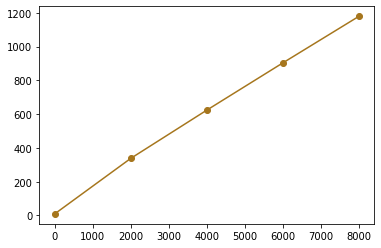

In [1290]:
plt.plot(np.arange(0,10000,2000), [np.max(np.sum((mat_m[beta][t].T)<0)) for t in np.arange(0,10000,2000)], 'o-')

In [1291]:
np.polyfit(np.arange(0,10000,2000), [np.max(np.sum((mat_m[beta][t].T)<0)) for t in np.arange(0,10000,2000)], deg=1)

array([ 0.1454, 29.4   ])

In [1292]:
40000*0.25

10000.0

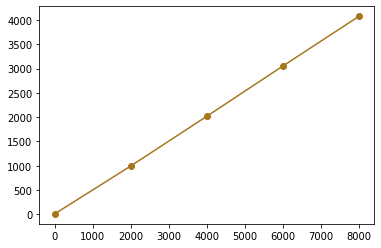

In [1293]:
plt.plot(np.arange(0,10000,2000), [np.sum((mat_m[beta][t].T.values[1250,:])<0) for t in np.arange(0,10000,2000)], 'o-')

In [1294]:
np.polyfit(np.arange(0,10000,2000), [np.sum((mat_m[beta][t].T.values[1250,:])<0) for t in np.arange(0,10000,2000)], deg=1)

array([ 0.50945, -8.     ])

# Varying $\gamma$

In [910]:
list_gamma=np.array([0.1,1.0])

In [934]:
Ny=1000

mat_m={}
for gamma in list_gamma:
    mat_m[gamma]={}
    for t in np.arange(0,5000,500):
        print(t)
        try:
            mat_m[gamma][t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/asympt_prof_varying_gamma/gamma%.1f/f_m_t%d.dat'%(gamma,t), sep=' ', dtype=np.float64, names=np.arange(Ny+1))
        except:
            pass


0
500
1000
1500
2000
2500
3000
3500
4000
4500
0
500
1000
1500
2000
2500
3000
3500
4000
4500


In [937]:
test=np.loadtxt('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/asympt_prof_varying_gamma/gamma%.1f/f_m_t%d.dat'%(gamma,t))

3500


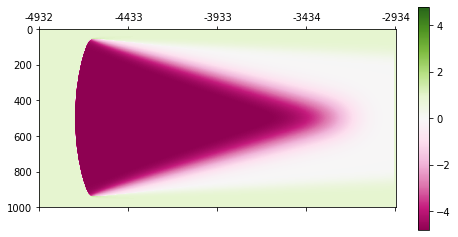

In [917]:
kt=-3
gamma=1.0

t=list(mat_m[gamma])[kt]
print(t)
V=np.nanmin(mat_m[gamma][0].values)/5
plt.matshow(mat_m[gamma][t].T, cmap='PiYG', vmin=V, vmax=-V)
plt.colorbar()

xabs=np.int64(np.linspace(0, mat_m[gamma][t].shape[0]-2, 5))
plt.xticks(xabs, np.int64(np.array(mat_m[gamma][t][0])[xabs]))

# plt.xlim(180,250)
# plt.ylim(140,160)

plt.show()


#plt.matshow(np.isnan(mat_m[gamma][t].T))

3500


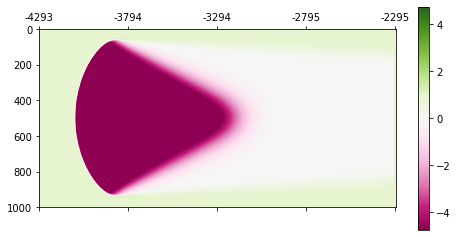

In [918]:
kt=-3
gamma=0.1

t=list(mat_m[gamma])[kt]
print(t)
V=np.nanmin(mat_m[gamma][0].values)/5
plt.matshow(mat_m[gamma][t].T, cmap='PiYG', vmin=V, vmax=-V)
plt.colorbar()

xabs=np.int64(np.linspace(0, mat_m[gamma][t].shape[0]-2, 5))
plt.xticks(xabs, np.int64(np.array(mat_m[gamma][t][0])[xabs]))

# plt.xlim(180,250)
# plt.ylim(140,160)

plt.show()


#plt.matshow(np.isnan(mat_m[gamma][t].T))

# Asters

In [1174]:
ly=100
ds=0.1
Ny=np.int64(ly/ds)-1

mat_aster_rho=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/f_rho_t%d.dat'%(900), sep=' ', dtype=np.float64, names=np.arange(Ny+1))
mat_aster_m=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/f_m_t%d.dat'%(900), sep=' ', dtype=np.float64, names=np.arange(Ny+1))


In [4]:
mat_aster_m={}
ly=1100
ds=1
Ny=np.int64(ly/ds)

for t in np.arange(100,900,100):
    mat_aster_m[t]=pd.read_csv('/users/invites/benvegnen/Thesis/AI2D/AI2D_hydro/PDEs_2d/f_m_t%d.dat'%(t), sep=' ', dtype=np.float64, names=np.arange(Ny+1))

    

800


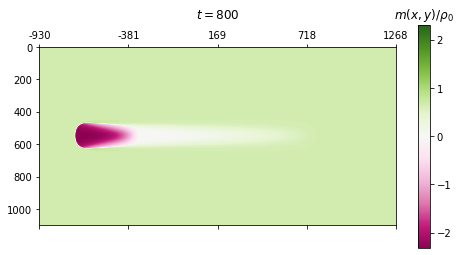

In [10]:
kt=-1

t=list(mat_aster_m)[kt]
print(t)
V=np.nanmin(mat_aster_m[t].values)/1
l=plt.matshow(mat_aster_m[t].T, cmap='PiYG', vmin=V, vmax=-V)
cbar=plt.colorbar(l)
cbar.ax.set_title(r'$m(x,y)/\rho_0$', rotation=0)

xabs=np.int64(np.linspace(0, mat_aster_m[t].shape[0]-2, 5))
plt.xticks(xabs, np.int64(mat_aster_m[t].index.values)[xabs])

plt.title(r'$t=%d$'%(t), pad=20)

plt.show()


#plt.matshow(np.isnan(mat_aster_m[t].T))

Text(0.5, 1.0, 'Slice along $y=150$')

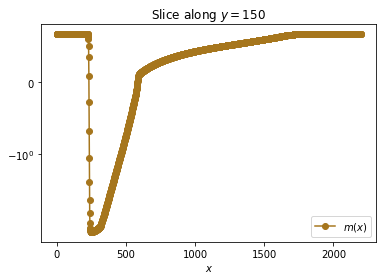

In [13]:
plt.plot(mat_aster_m[t].T.values[500,:], 'o-', label=r'$m(x)$')
#plt.plot(mat_rho.T.values[150,:], 'o-', label=r'$\rho(x)$')

plt.yscale('symlog')

plt.xlabel(r'$x$')
plt.legend()

plt.title('Slice along $y=150$')
# plt.xlim(0,50)


# Centering procedure

In [425]:
mat_m={}
for t in np.arange(0,1000,100):
    #mat_m[t]=pd.read_csv('/home/invites/benvegnen/AI2D/PDEs_2d/f_m_t%d.dat'%t, sep=' ', dtype=np.float64,  header=0, index_col=False)
    mat_m[t]=pd.read_csv('/home/invites/benvegnen/AI2D/PDEs_2d/f_m_t%d.dat'%t, sep=' ', dtype=np.float64, index_col=False, names=np.arange(501))


FileNotFoundError: [Errno 2] File /home/invites/benvegnen/AI2D/PDEs_2d/f_m_t700.dat does not exist: '/home/invites/benvegnen/AI2D/PDEs_2d/f_m_t700.dat'

In [397]:
t=0
plt.matshow(mat_m[t].drop('X', axis=1).T)

yabs=np.int64(np.linspace(0, mat_m[t].shape[1]-2, 5))
plt.yticks(yabs, np.int64(np.array(list(mat_m[t])[1:])[yabs]))

xabs=np.int64(np.linspace(0, mat_m[t].shape[0]-1, 5))
plt.xticks(xabs, np.int64(np.array(list(mat_m[t].X))[xabs]))

plt.colorbar()

KeyError: "['X'] not found in axis"

In [879]:
Ny=300

mat_m={}
for t in np.arange(0,2000,100):
    print(t)
    mat_m[t]=pd.read_csv('/home/invites/benvegnen/AI2D/PDEs_2d/f_m_t%d.dat'%t, sep=' ', dtype=np.float64, names=np.arange(Ny+2))


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


200


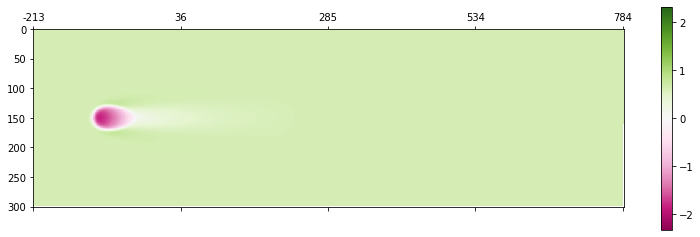

In [883]:
kt=2

t=list(mat_m)[kt]
print(t)
V=np.nanmin(mat_m[0].values)/10
plt.matshow(mat_m[t].T, cmap='PiYG', vmin=V, vmax=-V)
plt.colorbar()

xabs=np.int64(np.linspace(0, mat_m[t].shape[0]-2, 5))
plt.xticks(xabs, np.int64(np.array(mat_m[t][0])[xabs]))

# plt.xlim(180,250)
# plt.ylim(140,160)

plt.show()


#plt.matshow(np.isnan(mat_m[t].T))

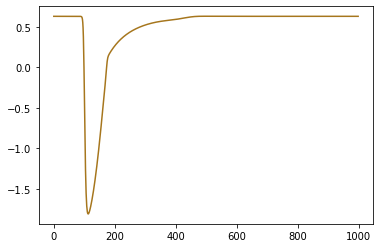

In [884]:
plt.plot(mat_m[t].T.values[150,:])


In [772]:
1/np.array([0.25, 0.40, 0.55, 0.70, 0.85, 1.0])

array([4.        , 2.5       , 1.81818182, 1.42857143, 1.17647059,
       1.        ])